In [272]:
import pandas as pd

df = pd.read_csv('reviews.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c8c713be-146d-4f31-aaf6-2acc04aaafb1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Panbu 143,5,0,348.0.0.46.105,2024-09-13 15:54:11,NaN,NaN,348.0.0.46.105
1,20bf512e-a675-4b96-afcb-9edb818dc727,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Update,5,0,278.0.0.22.117,2024-09-13 15:04:03,NaN,NaN,278.0.0.22.117
2,3ff788c5-9be2-4bd1-bd4f-da286c9c4770,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,You talk to anyone...🤌🏻💜... You can share your...,5,0,348.0.0.46.105,2024-09-13 15:03:52,NaN,NaN,348.0.0.46.105
3,2662bbc4-fa1f-4f45-9019-11f68d7174f4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Madharchood aap sirf time pass karta he,3,0,288.1.0.22.66,2024-09-13 14:24:52,NaN,NaN,288.1.0.22.66
4,680e9350-fcc2-41c7-89b1-523275d2c132,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good app,5,0,347.3.0.41.103,2024-09-13 13:56:33,NaN,NaN,347.3.0.41.103


In [273]:
df = df[['userName','content','at','score']]
df

,userName,content,at,score
0,A Google user,Panbu 143,2024-09-13 15:54:11,5
1,A Google user,Update,2024-09-13 15:04:03,5
2,A Google user,You talk to anyone...🤌🏻💜... You can share your...,2024-09-13 15:03:52,5
3,A Google user,Madharchood aap sirf time pass karta he,2024-09-13 14:24:52,3
4,A Google user,Good app,2024-09-13 13:56:33,5
...,...,...,...,...
319495,A Google user,Very good app and very energy,2024-06-08 04:19:36,5
319496,A Google user,It's is very nice,2024-06-08 04:17:25,5
319497,A Google user,The best social media app ever created,2024-06-08 04:16:56,5
319498,A Google user,The app is really good but there is a serious ...,2024-06-08 04:16:49,1


cleaning data

In [274]:
df=df.drop_duplicates(subset='content')

In [275]:
df.duplicated().sum()

0

In [276]:
df = df.dropna()

In [277]:
df.isnull().sum()

userName    0
content     0
at          0
score       0
dtype: int64

In [278]:
df.shape

(193666, 4)

In [279]:
df

,userName,content,at,score
0,A Google user,Panbu 143,2024-09-13 15:54:11,5
1,A Google user,Update,2024-09-13 15:04:03,5
2,A Google user,You talk to anyone...🤌🏻💜... You can share your...,2024-09-13 15:03:52,5
3,A Google user,Madharchood aap sirf time pass karta he,2024-09-13 14:24:52,3
4,A Google user,Good app,2024-09-13 13:56:33,5
...,...,...,...,...
319495,A Google user,Very good app and very energy,2024-06-08 04:19:36,5
319496,A Google user,It's is very nice,2024-06-08 04:17:25,5
319497,A Google user,The best social media app ever created,2024-06-08 04:16:56,5
319498,A Google user,The app is really good but there is a serious ...,2024-06-08 04:16:49,1


preprocessing

In [280]:
import re
import string

def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text= re.sub(r'\s+', ' ', text).strip() #hapus spasi yang berlebihan
    text = re.sub('https?://\S+|www\.\S+', '', text)  #hapus url
    text = re.sub(r"\b\d+\b", "", text)  #hapus number
    text = re.sub('<.*?>+', '', text)  #hapus special character
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
    return text

df['content'] = df['content'].apply(clean_text)

<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
C:\Users\User\AppData\Local\Temp\ipykernel_27720\1873008896.py:7: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)  #hapus url


In [281]:
def remove_numbers(text):
    if isinstance(text, str):
        return ''.join(char for char in text if not char.isdigit())
    else:
        return text

df['content']=df['content'].apply(remove_numbers)

In [282]:
df

,userName,content,at,score
0,A Google user,Panbu,2024-09-13 15:54:11,5
1,A Google user,Update,2024-09-13 15:04:03,5
2,A Google user,You talk to anyone You can share your vibe And...,2024-09-13 15:03:52,5
3,A Google user,Madharchood aap sirf time pass karta he,2024-09-13 14:24:52,3
4,A Google user,Good app,2024-09-13 13:56:33,5
...,...,...,...,...
319495,A Google user,Very good app and very energy,2024-06-08 04:19:36,5
319496,A Google user,Its is very nice,2024-06-08 04:17:25,5
319497,A Google user,The best social media app ever created,2024-06-08 04:16:56,5
319498,A Google user,The app is really good but there is a serious ...,2024-06-08 04:16:49,1


In [283]:
#lower
df['content'] = df['content'].str.lower()

In [284]:
df

,userName,content,at,score
0,A Google user,panbu,2024-09-13 15:54:11,5
1,A Google user,update,2024-09-13 15:04:03,5
2,A Google user,you talk to anyone you can share your vibe and...,2024-09-13 15:03:52,5
3,A Google user,madharchood aap sirf time pass karta he,2024-09-13 14:24:52,3
4,A Google user,good app,2024-09-13 13:56:33,5
...,...,...,...,...
319495,A Google user,very good app and very energy,2024-06-08 04:19:36,5
319496,A Google user,its is very nice,2024-06-08 04:17:25,5
319497,A Google user,the best social media app ever created,2024-06-08 04:16:56,5
319498,A Google user,the app is really good but there is a serious ...,2024-06-08 04:16:49,1


In [285]:
def remove_character(text):
    if isinstance(text, str):  # checks if a string value exists
        text = text.lower()  # converting to lowercase
        text = re.sub('https?://\S+|www\.\S+', '', text)  # removing URL links
        text = re.sub(r"\b\d+\b", "", text)  # removing number
        text = re.sub('<.*?>+', '', text)  # removing special characters
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # punctuations
        text = re.sub('\n', '', text)
        text = re.sub('[’“”…]', '', text)
        return text
    else:
        return text
    
df['content'] = df['content'].apply(remove_character)

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\User\AppData\Local\Temp\ipykernel_27720\107040497.py:4: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)  # removing URL links


In [286]:
def remove_emoji(text):
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text
    
df['content'] = df['content'].apply(remove_emoji)
df

,userName,content,at,score
0,A Google user,panbu,2024-09-13 15:54:11,5
1,A Google user,update,2024-09-13 15:04:03,5
2,A Google user,you talk to anyone you can share your vibe and...,2024-09-13 15:03:52,5
3,A Google user,madharchood aap sirf time pass karta he,2024-09-13 14:24:52,3
4,A Google user,good app,2024-09-13 13:56:33,5
...,...,...,...,...
319495,A Google user,very good app and very energy,2024-06-08 04:19:36,5
319496,A Google user,its is very nice,2024-06-08 04:17:25,5
319497,A Google user,the best social media app ever created,2024-06-08 04:16:56,5
319498,A Google user,the app is really good but there is a serious ...,2024-06-08 04:16:49,1


In [287]:
#normalisasi
def remove_short_form(text):
    if isinstance(text, str):
        # removing short form:
        text = re.sub("isn't", 'is not', text)
        text = re.sub("he's", 'he is', text)
        text = re.sub("wasn't", 'was not', text)
        text = re.sub("there's", 'there is', text)
        text = re.sub("couldn't", 'could not', text)
        text = re.sub("won't", 'will not', text)
        text = re.sub("they're", 'they are', text)
        text = re.sub("she's", 'she is', text)
        text = re.sub("There's", 'there is', text)
        text = re.sub("wouldn't", 'would not', text)
        text = re.sub("haven't", 'have not', text)
        text = re.sub("That's", 'That is', text)
        text = re.sub("you've", 'you have', text)
        text = re.sub("He's", 'He is', text)
        text = re.sub("what's", 'what is', text)
        text = re.sub("weren't", 'were not', text)
        text = re.sub("we're", 'we are', text)
        text = re.sub("hasn't", 'has not', text)
        text = re.sub("you'd", 'you would', text)
        text = re.sub("shouldn't", 'should not', text)
        text = re.sub("let's", 'let us', text)
        text = re.sub("they've", 'they have', text)
        text = re.sub("You'll", 'You will', text)
        text = re.sub("i'm", 'i am', text)
        text = re.sub("we've", 'we have', text)
        text = re.sub("it's", 'it is', text)
        text = re.sub("don't", 'do not', text)
        text = re.sub("that´s", 'that is', text)
        text = re.sub("I´m", 'I am', text)
        text = re.sub("it’s", 'it is', text)
        text = re.sub("she´s", 'she is', text)
        text = re.sub("he’s'", 'he is', text)
        text = re.sub('I’m', 'I am', text)
        text = re.sub('I’d', 'I did', text)
        text = re.sub("he’s'", 'he is', text)
        text = re.sub('there’s','there is',text)
        return text
    else:
        return text
    
def remove_multiple_space(text):
    if isinstance(text, str):
        text = text.strip()
        text = re.sub(r'\s+', ' ', text)
        return text
    else:
        return text


In [288]:
df['content'] = df['content'].apply(remove_short_form)
df['content'] = df['content'].apply(remove_multiple_space)

In [289]:
from langdetect import detect
from collections import Counter 

def detect_english(text):
    if not text or len(text.strip()) == 0:
        return False  # Jika teks kosong atau hanya spasi
    if len(text.split()) < 3:  # Jika teks terlalu pendek (misal kurang dari 3 kata)
        return False
    try:
        return detect(text) == 'en'
    except Exception as e:
        print(f"Error detecting language: {e} - {text}")
        return False
    
cnt = Counter()
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

In [290]:
df = df[df['content'].str.strip().astype(bool)]
df['is_english'] = df['content'].apply(detect_english)
df = df[df['is_english']]
df = df.drop(columns=['is_english'])

C:\Users\User\AppData\Local\Temp\ipykernel_27720\2517663481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_english'] = df['content'].apply(detect_english)


In [291]:
df.rename(columns={'score': 'sentiment'}, inplace=True)

In [292]:
df

,userName,content,at,sentiment
2,A Google user,you talk to anyone you can share your vibe and...,2024-09-13 15:03:52,5
3,A Google user,madharchood aap sirf time pass karta he,2024-09-13 14:24:52,3
5,A Google user,instagram was a good appwas now it has bugs an...,2024-09-13 12:54:04,3
11,A Google user,one small app suggestion maybe stop being such...,2024-09-13 07:42:57,1
13,A Google user,no black dark mode also forced me to agree to ...,2024-09-13 03:40:49,1
...,...,...,...,...
319492,A Google user,very effective app user friendly and easy to n...,2024-06-08 04:20:51,5
319496,A Google user,its is very nice,2024-06-08 04:17:25,5
319497,A Google user,the best social media app ever created,2024-06-08 04:16:56,5
319498,A Google user,the app is really good but there is a serious ...,2024-06-08 04:16:49,1


In [293]:
#remove stopword
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stop_words = stopwords.words()

df['content']=df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [294]:
#remove yang kosong dan double
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [295]:
#remove kata yang sering keluar
df["content"] = df["content"].apply(lambda text: remove_freqwords(text))

In [296]:
#ubah ratingnya
df['sentiment'] = [0 if each in (1, 2, 3) else 1 for each in df.sentiment]

In [297]:
df

,userName,content,at,sentiment
2,A Google user,talk share vibe entertain app app helpful valu...,2024-09-13 15:03:52,1
3,A Google user,madharchood sirf time pass,2024-09-13 14:24:52,0
5,A Google user,instagram appwas bugs crashes secondidk proble...,2024-09-13 12:54:04,0
11,A Google user,small app suggestion stop bone smokers give lo...,2024-09-13 07:42:57,0
13,A Google user,black dark forced agree terms swiped away,2024-09-13 03:40:49,0
...,...,...,...,...
319492,A Google user,effective app user friendly easy navigate stress,2024-06-08 04:20:51,1
319496,A Google user,nice,2024-06-08 04:17:25,1
319497,A Google user,social media app created,2024-06-08 04:16:56,1
319498,A Google user,app security issue posted app week back pictur...,2024-06-08 04:16:49,0


In [298]:
df.to_csv("cleaned_reviews.csv")

tokenization

In [299]:
data = pd.read_csv('cleaned_reviews.csv')
data.head()

,Unnamed: 0,userName,content,at,sentiment
0,2,A Google user,talk share vibe entertain app app helpful valu...,2024-09-13 15:03:52,1
1,3,A Google user,madharchood sirf time pass,2024-09-13 14:24:52,0
2,5,A Google user,instagram appwas bugs crashes secondidk proble...,2024-09-13 12:54:04,0
3,11,A Google user,small app suggestion stop bone smokers give lo...,2024-09-13 07:42:57,0
4,13,A Google user,black dark forced agree terms swiped away,2024-09-13 03:40:49,0


In [300]:
data.dropna(inplace=True)

In [301]:
data

,Unnamed: 0,userName,content,at,sentiment
0,2,A Google user,talk share vibe entertain app app helpful valu...,2024-09-13 15:03:52,1
1,3,A Google user,madharchood sirf time pass,2024-09-13 14:24:52,0
2,5,A Google user,instagram appwas bugs crashes secondidk proble...,2024-09-13 12:54:04,0
3,11,A Google user,small app suggestion stop bone smokers give lo...,2024-09-13 07:42:57,0
4,13,A Google user,black dark forced agree terms swiped away,2024-09-13 03:40:49,0
...,...,...,...,...,...
101372,319492,A Google user,effective app user friendly easy navigate stress,2024-06-08 04:20:51,1
101373,319496,A Google user,nice,2024-06-08 04:17:25,1
101374,319497,A Google user,social media app created,2024-06-08 04:16:56,1
101375,319498,A Google user,app security issue posted app week back pictur...,2024-06-08 04:16:49,0


In [332]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize)
text_counts = cv.fit_transform(data['content'])

#split dataset
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['sentiment'], test_size=0.25, random_state=12)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


model evaluation

In [333]:
model = ComplementNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('ComplementNB model accuracy is', str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')

print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 81.19%
------------------------------------------------
Confusion Matrix:
      0      1
0  8948   2022
1  2663  11280
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.77      0.82      0.79     10970
     Positif       0.85      0.81      0.83     13943

    accuracy                           0.81     24913
   macro avg       0.81      0.81      0.81     24913
weighted avg       0.81      0.81      0.81     24913



visualization

In [334]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

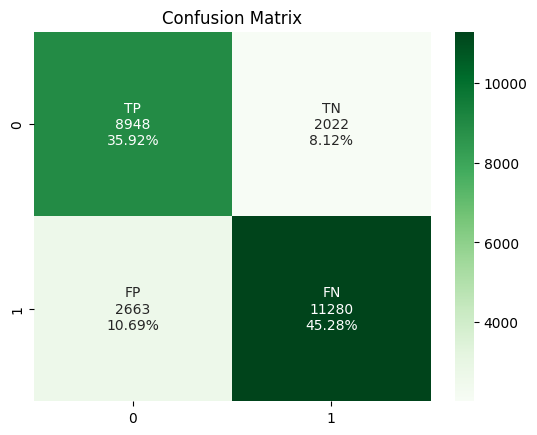

In [335]:
# Confusion Matrix Visualization
cf_matrix = confusion_matrix(y_test, predicted)

group_names = ['TP','TN','FP','FN']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

plt.title('Confusion Matrix')
plt.show()

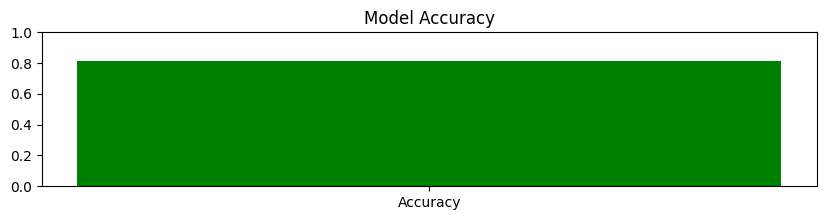

ComplementNB model accuracy is 81.19%


In [336]:
# Accuracy Visualization
accuracy_score = metrics.accuracy_score(predicted, y_test)
plt.figure(figsize=(10, 2))
plt.bar(['Accuracy'], [accuracy_score], color=['green'])
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.show()
print('ComplementNB model accuracy is', str('{:04.2f}'.format(accuracy_score*100))+'%')

In [337]:
# Word Cloud Visualization
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Sentiment Positive
positive_text = ' '.join(data[data['sentiment'] == 1]['content'])
plot_wordcloud(positive_text, 'Word Cloud for Positive Sentiment')

# Sentiment Positive
negatif_text = ' '.join(data[data['sentiment'] == 0]['content'])
plot_wordcloud(negatif_text, 'Word Cloud for Negative Sentiment')

ValueError: We need at least 1 word to plot a word cloud, got 0.

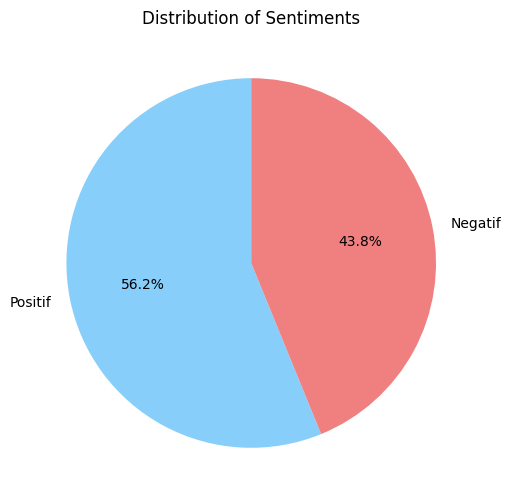

In [338]:
# Visualization Sentiment
data['sentiment'] = data['sentiment'].replace({1: 'Positif', 0: 'Negatif'})
sentiment_counts = data['sentiment'].value_counts()

# Visualization with pie charts
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index,autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'lightcoral'])
plt.title('Distribution of Sentiments')
plt.show()